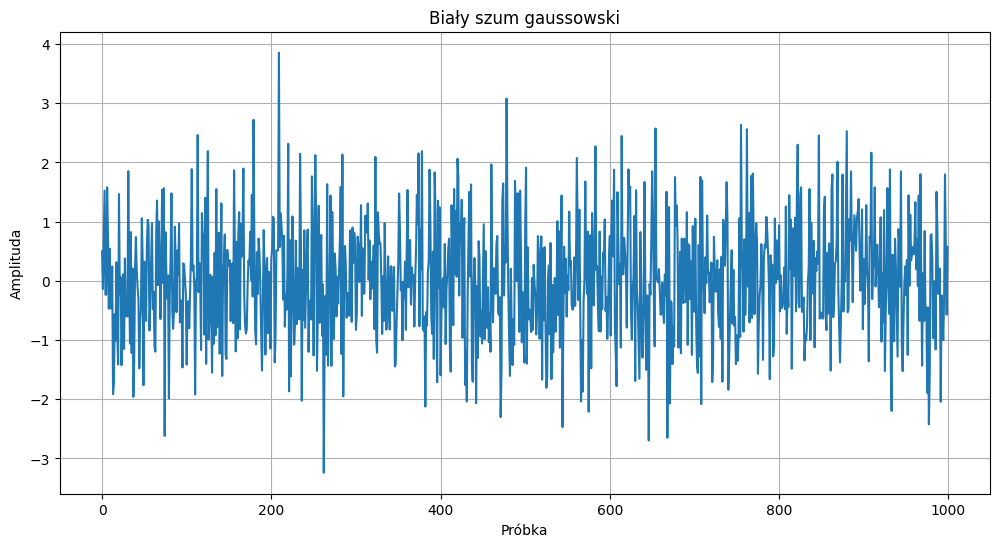

Estymowana średnia: 0.0193
Estymowana wariancja: 0.9579


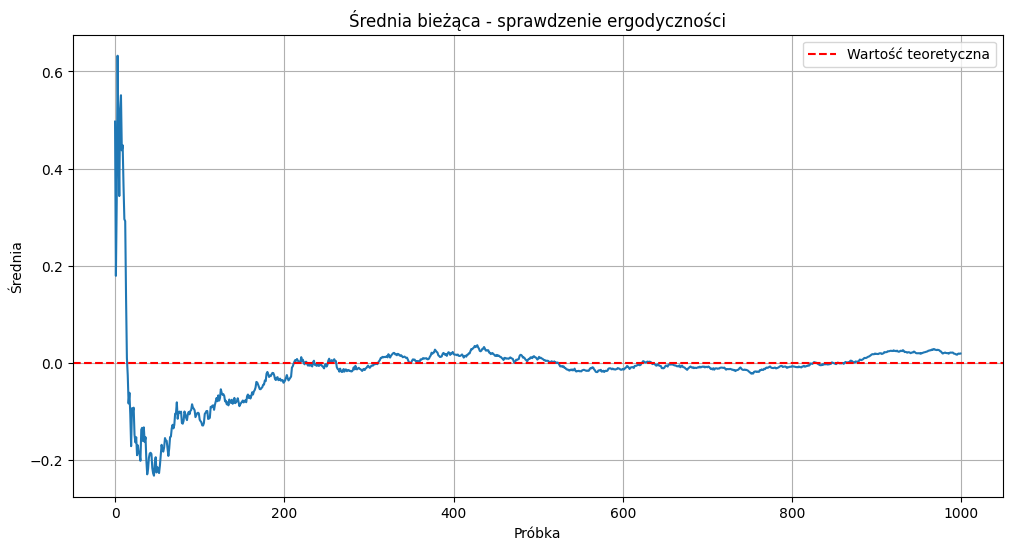

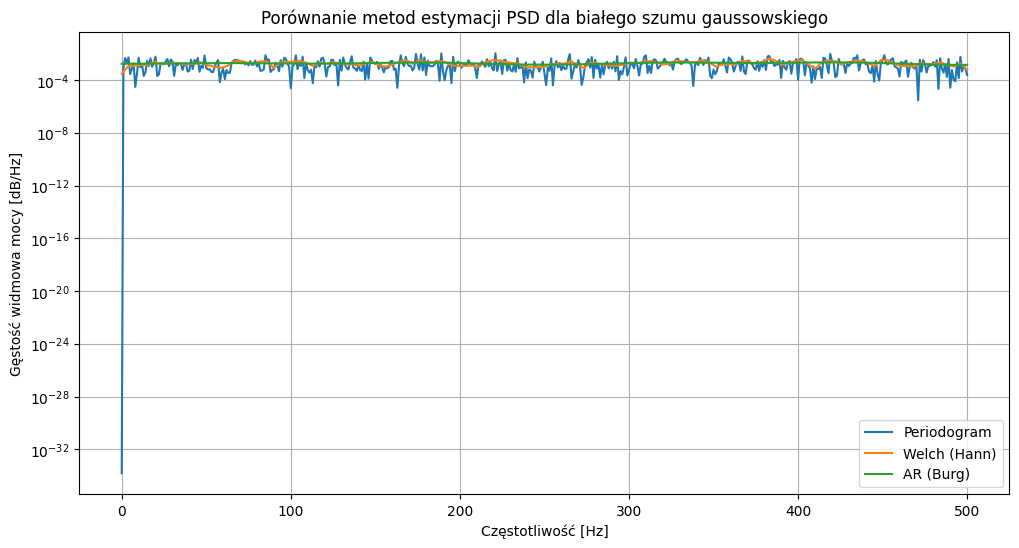

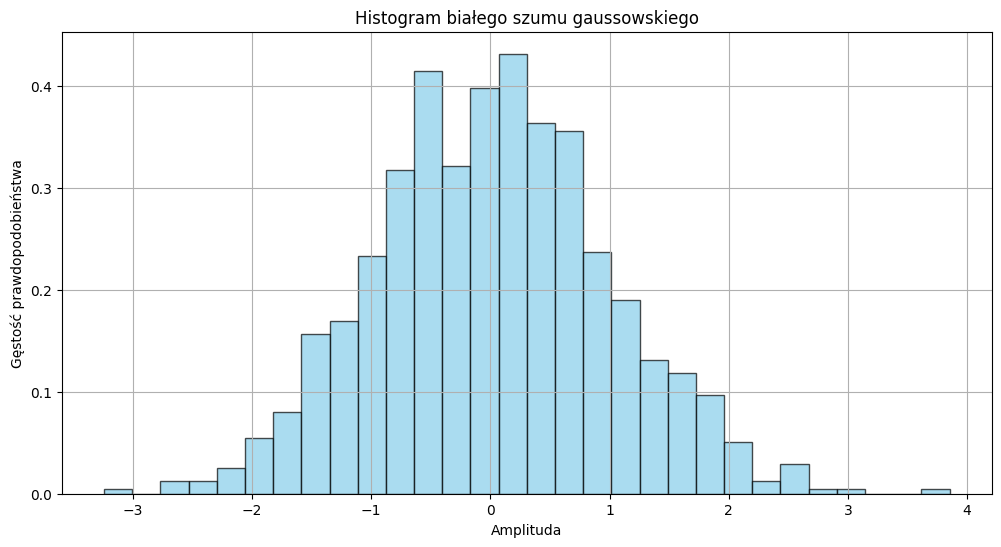

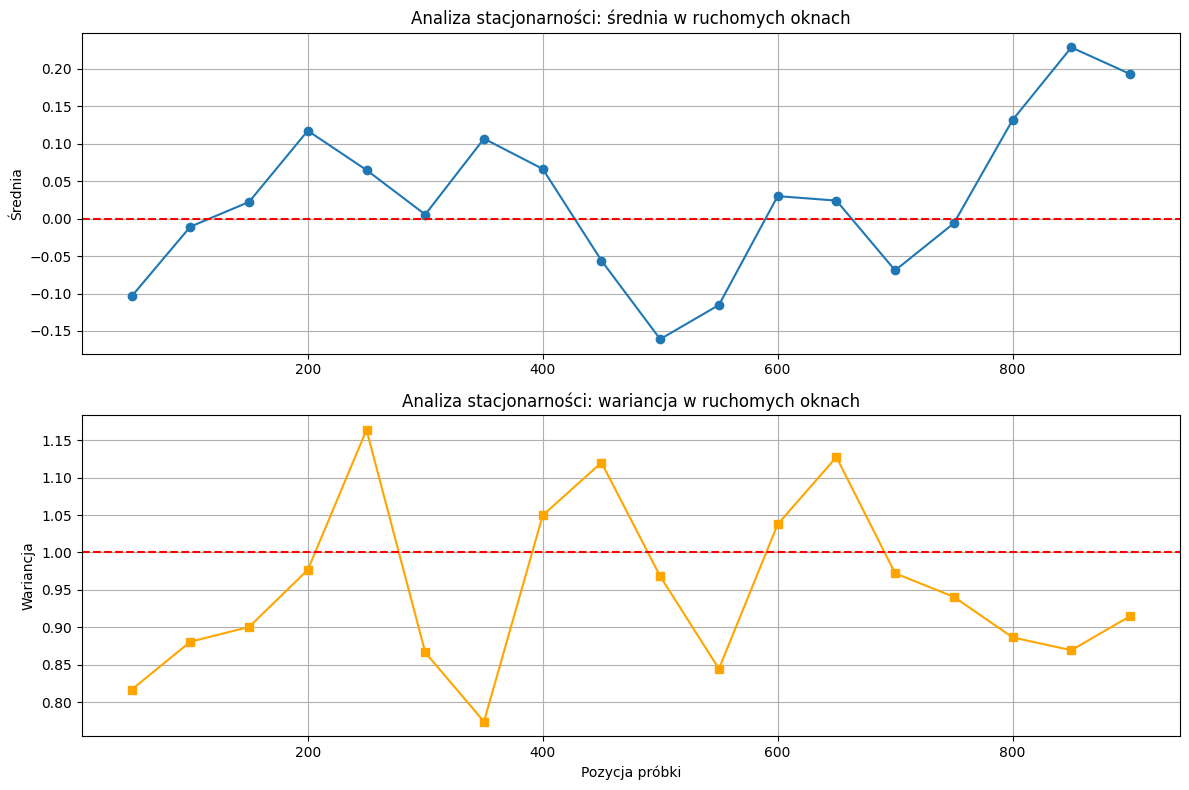

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, welch
from spectrum import pburg

# 1. Generowanie sygnału białego szumu gaussowskiego
N = 1000  # liczba próbek
mean_val = 0  # wartość średnia
std_dev = 1  # odchylenie standardowe
fs = 1000  # częstotliwość próbkowania [Hz]

# Generowanie białego szumu gaussowskiego
np.random.seed(42)  # dla powtarzalności wyników
white_noise = np.random.normal(loc=mean_val, scale=std_dev, size=N)

# 2. Wykres sygnału
plt.figure(figsize=(12, 6))
plt.plot(white_noise)
plt.title("Biały szum gaussowski")
plt.xlabel("Próbka")
plt.ylabel("Amplituda")
plt.grid(True)
plt.show()

# 3. Estymacja średniej i wariancji
mean_est = np.mean(white_noise)
variance_est = np.var(white_noise)

print(f"Estymowana średnia: {mean_est:.4f}")
print(f"Estymowana wariancja: {variance_est:.4f}")

# 4. Sprawdzenie ergodyczności (średnia bieżąca)
running_mean = np.cumsum(white_noise) / np.arange(1, N + 1)

plt.figure(figsize=(12, 6))
plt.plot(running_mean)
plt.axhline(y=mean_val, color='r', linestyle='--', label='Wartość teoretyczna')
plt.title("Średnia bieżąca - sprawdzenie ergodyczności")
plt.xlabel("Próbka")
plt.ylabel("Średnia")
plt.legend()
plt.grid(True)
plt.show()

# 5. Estymacja widmowej gęstości mocy (PSD)
# a) Metoda periodogramu
f, Pxx_per = periodogram(white_noise, fs=fs)

# b) Metoda Welcha
f_welch, Pxx_welch = welch(white_noise, fs=fs, nperseg=256, noverlap=128, window='hann')

# c) Metoda parametryczna (model AR)
ar_order = 8  # rząd modelu AR
ar_model = pburg(white_noise, order=ar_order, NFFT=1024, sampling=fs)

# 6. Wykresy porównawcze metod PSD
plt.figure(figsize=(12, 6))
plt.semilogy(f, Pxx_per, label='Periodogram')
plt.semilogy(f_welch, Pxx_welch, label='Welch (Hann)')
plt.semilogy(ar_model.frequencies(), ar_model.psd, label='AR (Burg)')
plt.title("Porównanie metod estymacji PSD dla białego szumu gaussowskiego")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Gęstość widmowa mocy [dB/Hz]")
plt.legend()
plt.grid(True)
plt.show()

# 7. Dodatkowa analiza - histogram
plt.figure(figsize=(12, 6))
plt.hist(white_noise, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Histogram białego szumu gaussowskiego")
plt.xlabel("Amplituda")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.grid(True)
plt.show()

# 8. Sprawdzenie stacjonarności (średnia i wariancja w oknach)
window_size = 100
step = 50
means = []
vars = []
positions = []

for start in range(0, N - window_size, step):
    window = white_noise[start:start + window_size]
    means.append(np.mean(window))
    vars.append(np.var(window))
    positions.append(start + window_size // 2)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(positions, means, marker='o')
plt.axhline(y=mean_val, color='r', linestyle='--')
plt.title("Analiza stacjonarności: średnia w ruchomych oknach")
plt.ylabel("Średnia")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(positions, vars, marker='s', color='orange')
plt.axhline(y=std_dev**2, color='r', linestyle='--')
plt.title("Analiza stacjonarności: wariancja w ruchomych oknach")
plt.xlabel("Pozycja próbki")
plt.ylabel("Wariancja")
plt.grid(True)

plt.tight_layout()
plt.show()